In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from matplotlib import colors as mcolors

In [4]:
iris = datasets.load_iris()
features = iris['feature_names']
classes = iris['target_names']
df = pd.DataFrame(iris['data'], columns=features)
y = iris['target']
df['target']  = classes[y]
del iris


In [7]:
mycolor = np.array(list(mcolors.BASE_COLORS.keys()))
mycolor

array(['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'], dtype='<U1')

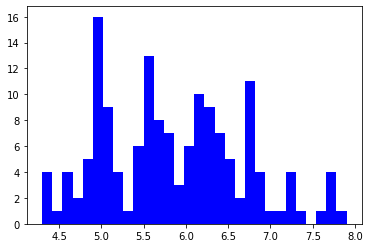

In [ ]:
#1 dimentional data
#histogram
plt.hist(df['sepal length (cm)'], bins=30, color=mycolor[0]) #bins is the number of bars
plt.show()

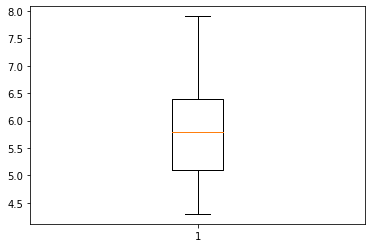

In [11]:
#boxplot
plt.boxplot(df['sepal length (cm)'])
plt.show()

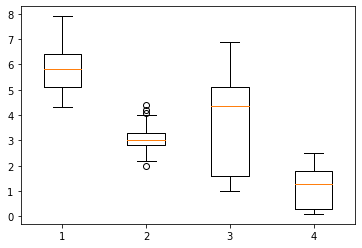

In [14]:
#making boxplot for all features at the same time
plt.boxplot(df.drop('target', axis=1))
plt.show()

([<matplotlib.axis.XTick at 0x206f6154430>,
 [Text(1, 0, 'sepal length (cm)'),
  Text(2, 0, 'sepal width (cm)'),
  Text(3, 0, 'petal length (cm)'),
  Text(4, 0, 'petal width (cm)')])

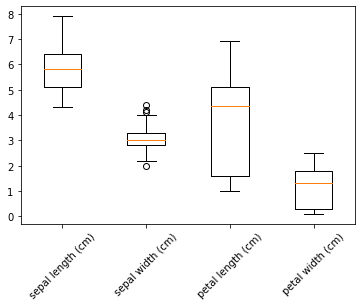

In [19]:
#second way for boxplot
#second way 
plt.boxplot([df[feature] for feature in features])
plt.xticks(range(1, len(features)+1), features, rotation=45)

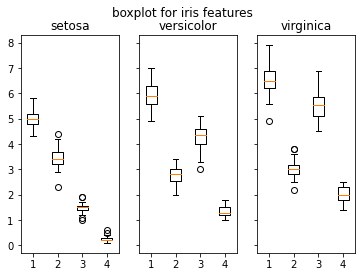

In [26]:
fig = plt.figure()
gs = fig.add_gridspec(1,3, hspace=0)
ax = gs.subplots(sharey=True)
fig.suptitle('boxplot for iris features')
ax[0].boxplot(df.loc[df['target'] == classes[0], features])
ax[0].set_title(classes[0])
ax[1].boxplot(df.loc[df['target'] == classes[1], features])
ax[1].set_title(classes[1])
ax[2].boxplot(df.loc[df['target'] == classes[2], features])
ax[2].set_title(classes[2])
plt.show()

([<matplotlib.axis.XTick at 0x206f63f74c0>,
 [Text(1, 0, 'sepal length (cm)'),
  Text(2, 0, 'sepal width (cm)'),
  Text(3, 0, 'petal length (cm)'),
  Text(4, 0, 'petal width (cm)')])

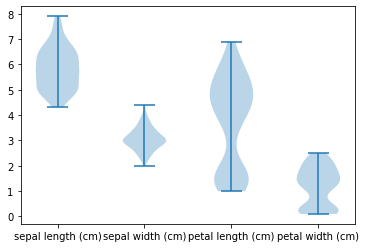

In [27]:
#violin plot
plt.violinplot(df.drop('target', axis=1))
plt.xticks(range(1,len(features)+1), features)

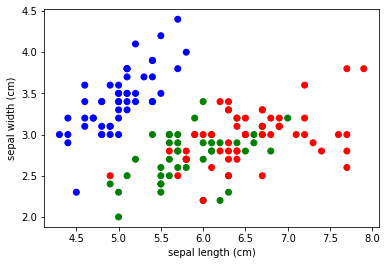

In [28]:
#2 dimentional plot
#scatter plot
plt.figure()
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=mycolor[y])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

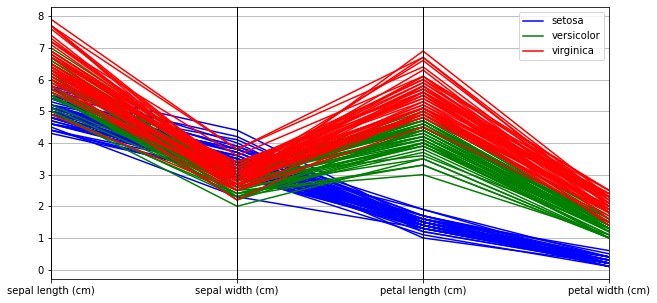

In [30]:
#parallel plot
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(10,5))
parallel_coordinates(df, 'target' , color=mycolor)
plt.show()

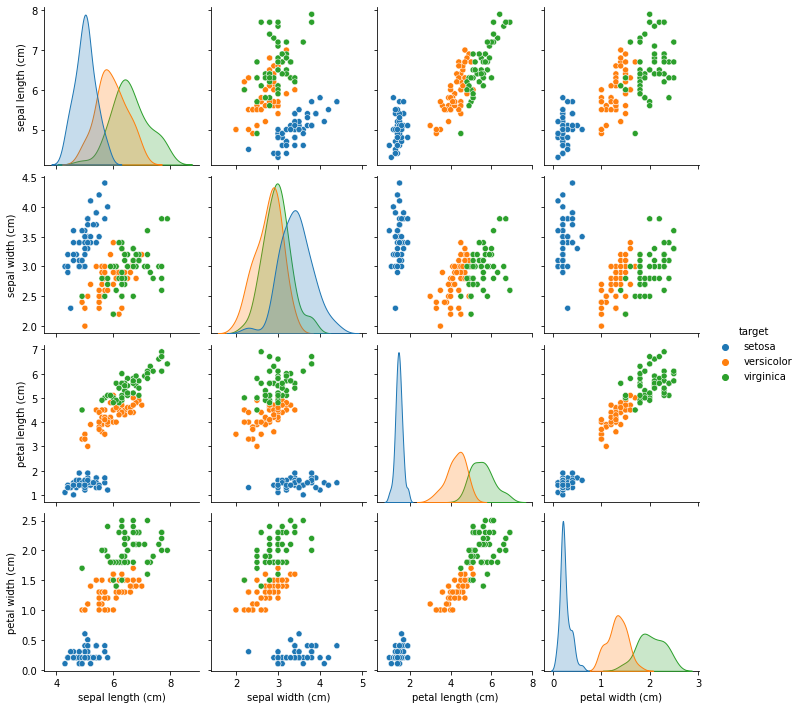

In [31]:
import seaborn as sns
sns.pairplot(df, hue='target')
plt.show()

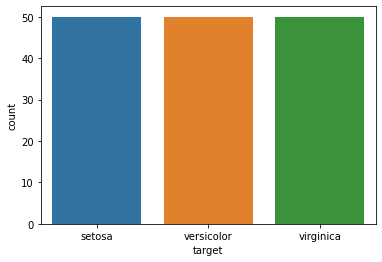

In [33]:
#countplot
sns.countplot(x=df['target'], label='count')
plt.show()

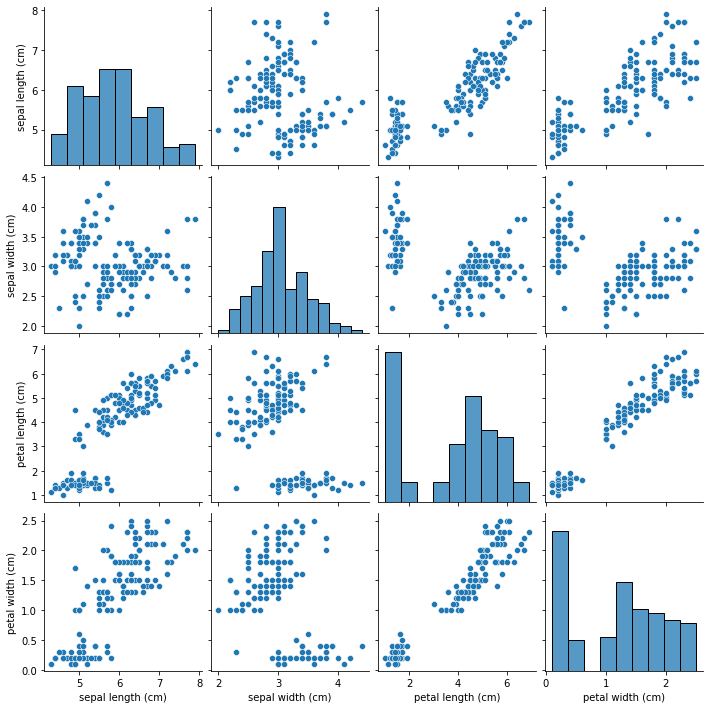

In [34]:
sns.pairplot(df)


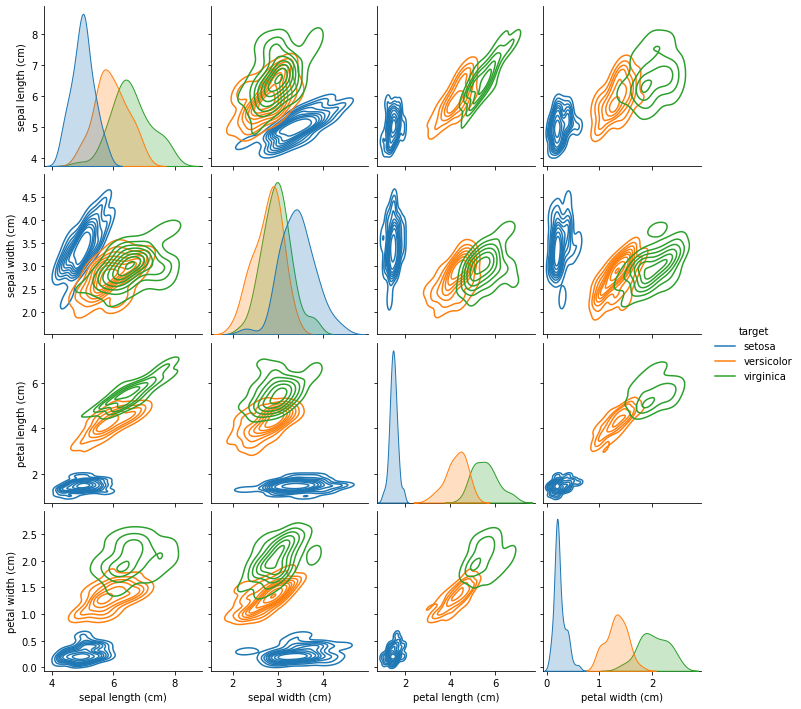

In [36]:
sns.pairplot(df, hue='target', kind='kde')

In [37]:
#dimension reduction
from sklearn.decomposition import PCA
PCAdata = PCA(n_components=3).fit_transform(df.drop('target', axis=1))
PCAdata[:5,]

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924]])

Text(0.5, 0, 'PCA1')

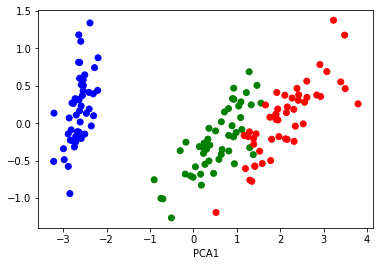

In [40]:
plt.scatter(PCAdata[:,0], PCAdata[:,1], c=mycolor[y])
plt.xlabel('PCA1')

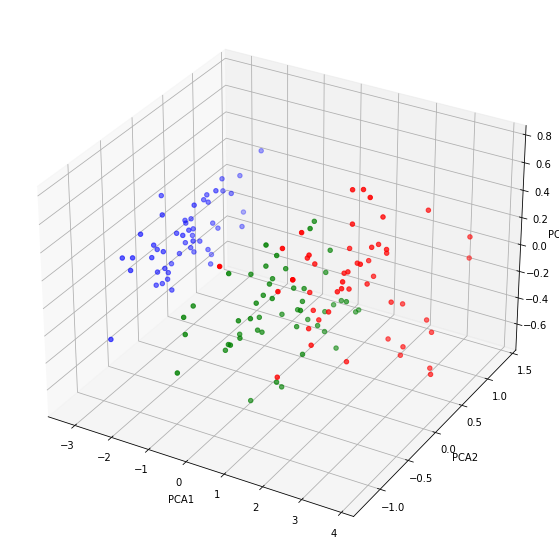

In [ ]:
#making a 3 dimension of out 3 components pca
fig = plt.figure(1, figsize=(10,10))
ax = fig.add_subplot(111, projection='3d') #111 is the number of rows, columns and the position of the plot
ax.scatter(PCAdata[:,0], PCAdata[:,1], PCAdata[:,2], c=mycolor[y])
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.show()

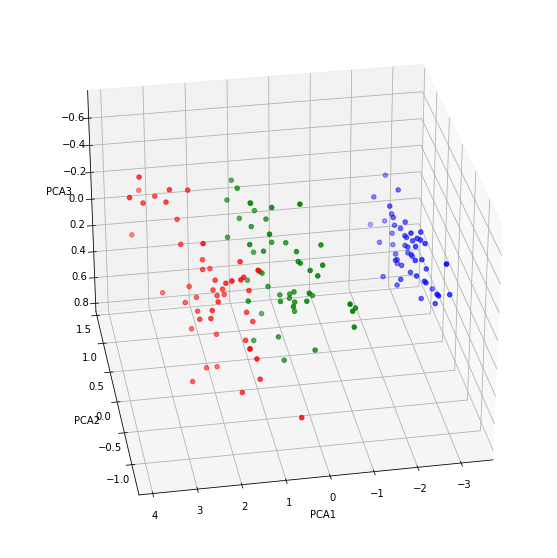

In [44]:
#changing the angle of the plot
fig = plt.figure(1, figsize=(10,10))
ax = fig.add_subplot(111, projection='3d', elev= -150, azim= 100) #elev and azim are the angles
ax.scatter(PCAdata[:,0], PCAdata[:,1], PCAdata[:,2], c=mycolor[y])
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.show() 